**复习**：回顾学习完第一章，我们对泰坦尼克号数据有了基本的了解，也学到了一些基本的统计方法，第二章中我们学习了数据的清理和重构，使得数据更加的易于理解；今天我们要学习的是第二章第三节：**数据可视化**，主要给大家介绍一下Python数据可视化库Matplotlib，在本章学习中，你也许会觉得数据很有趣。在打比赛的过程中，数据可视化可以让我们更好的看到每一个关键步骤的结果如何，可以用来优化方案，是一个很有用的技巧。

# 2 第二章：数据可视化  
开始之前，导入numpy、pandas以及matplotlib包和数据

In [114]:
import numpy as np
import pandas as pd

In [22]:
df = pd.read_csv('result.csv')

## 2.7 如何让人一眼看懂你的数据？
《Python for Data Analysis》第九章

### 2.7.1 任务一：跟着书本第九章，了解matplotlib，自己创建一个数据项，对其进行基本可视化
【思考】最基本的可视化图案有哪些？分别适用于那些场景？（比如折线图适合可视化某个属性值随时间变化的走势）

直方图：适用二维数据中的一维比较，另一维一般是时间或类别；  
折线图：一般适用于描述趋势，纵轴代表数据特征，横轴一般是自变量，时间或者主动改变的变量；  
饼图：反应某部分对整体的占比时选择饼图效果显著；  
散点图：可以表示分布趋势，当数量庞大时可以绘制回归图；  
气泡图：类似散点图，但是每个气泡以面积来反映一个维度的信息，在面积之上还可以叠加颜色等来增加一个维度的信息；  
雷达图：反应自变量多个维度的信息，如游戏人物的能力值，一般以五边形或者六边形为主。

In [23]:
import matplotlib.pyplot as plt

plt.scatter() 散点图  
plt.plot() 折线图  
plt.bar() 直方图  
plt.pie() 饼图  
plt.boxplot() 箱型图

### 2.7.2 任务二：可视化展示泰坦尼克号数据集中男女中生存人数分布情况（用柱状图试试）。

<AxesSubplot:title={'center':'Survived'}, xlabel='Sex'>

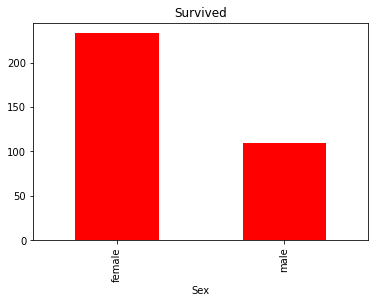

In [36]:
df.groupby('Sex')['Survived'].sum().plot.bar(title = 'Survived',color='r')

plot.bar()可以直接显示上面这张图，但是有时候我们需要改变颜色，宽度，柱状图的柱子位置，就需要用到plt封包。

### 2.7.3 任务三：可视化展示泰坦尼克号数据集中男女中生存人与死亡人数的比例图（用柱状图试试）。

<AxesSubplot:title={'center':'Survived and Died'}, xlabel='Sex,Survived'>

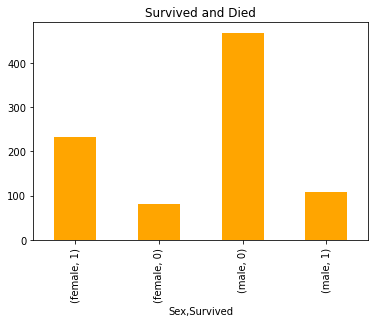

In [39]:
df.groupby('Sex')['Survived'].value_counts().plot.bar(title = 'Survived and Died',color='orange')

### 2.7.4 任务四：可视化展示泰坦尼克号数据集中不同票价的人生存和死亡人数分布情况。（用折线图试试）（横轴是不同票价，纵轴是存活人数）
【提示】对于这种统计性质的且用折线表示的数据，你可以考虑将数据排序或者不排序来分别表示。看看你能发现什么？

In [57]:
Fare = df.groupby(['Fare', 'Survived'])['Survived'].count().unstack()
Fare = Fare.fillna(0)
Fare

Survived,0,1
Fare,,
0.0000,14.0,1.0
4.0125,1.0,0.0
5.0000,1.0,0.0
6.2375,1.0,0.0
6.4375,1.0,0.0
...,...,...
227.5250,1.0,3.0
247.5208,1.0,1.0
262.3750,0.0,2.0


<AxesSubplot:xlabel='Price', ylabel='number'>

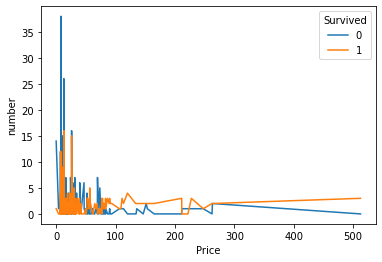

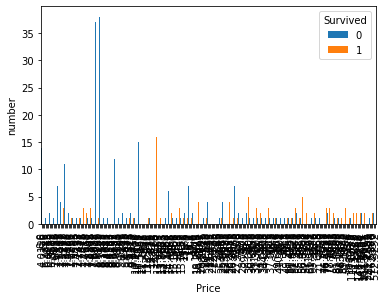

In [73]:
Fare.plot(xlabel = 'Price', ylabel = 'number')
Fare.plot.bar(xlabel = 'Price', ylabel = 'number')

### 2.7.5 任务五：可视化展示泰坦尼克号数据集中不同仓位等级的人生存和死亡人员的分布情况。（用柱状图试试）

In [66]:
Pclass = df.groupby(['Pclass', 'Survived'])['Survived'].count().unstack()
Pclass = Pclass.fillna(0)
Pclass

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<AxesSubplot:xlabel='Pclass'>

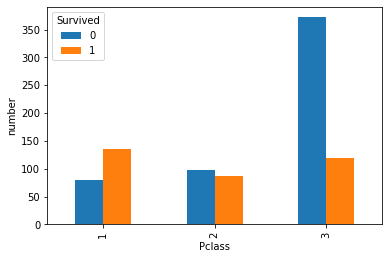

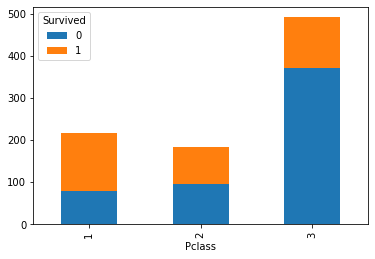

In [72]:
Pclass.plot.bar(xlabel = 'Pclass', ylabel = 'number')
Pclass.plot(kind = 'bar', stacked = 'True')

【思考】看到这个前面几个数据可视化，说说你的第一感受和你的总结  
对于不反应趋势的二维数据而言，用折线图看得乱七八糟的，而用直方图就非常直观，但是有时候却是看表格比较直观，比如任务2.7.4。所以要具体问题具体分析。

### 2.7.6 任务六：可视化展示泰坦尼克号数据集中不同年龄的人生存与死亡人数分布情况。(不限表达方式)

In [74]:
Age = df.groupby(['Age', 'Survived'])['Survived'].count().unstack()
Age = Age.fillna(0) # 防止有空数据
Age

Survived,0,1
Age,,
0.42,0.0,1.0
0.67,0.0,1.0
0.75,0.0,2.0
0.83,0.0,2.0
0.92,0.0,1.0
...,...,...
70.00,2.0,0.0
70.50,1.0,0.0
71.00,2.0,0.0


<AxesSubplot:xlabel='Age'>

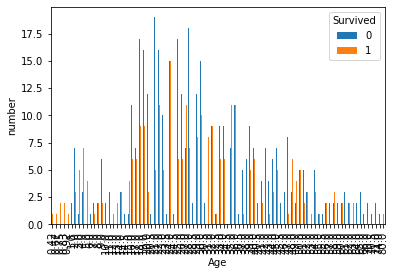

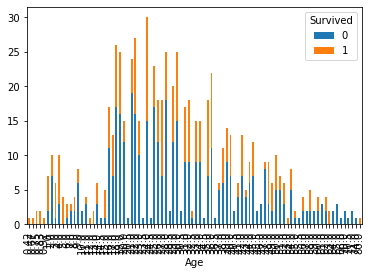

In [75]:
Age.plot.bar(xlabel = 'Age', ylabel = 'number')
Age.plot(kind = 'bar', stacked = 'True')

很明显，对于这种横轴一堆的，不适合直方图而适合折线图，画一下看看。

<AxesSubplot:xlabel='Age', ylabel='number'>

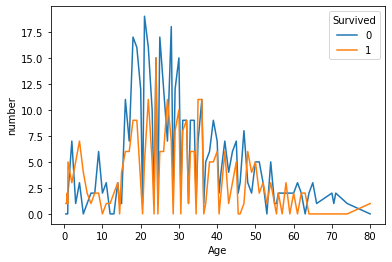

In [76]:
Age.plot(xlabel = 'Age', ylabel = 'number')

也不好看，因为0和1是同一个年龄段都有的两个表示同样一件事的特征数据，即非0即1，单独看一个0或者一个1其实意义也不大，还不如看表格或者统计百分比，因为不同年龄阶段的人数也不一样。而这个可以用到hist函数中的密度曲线这一概念。

Text(0, 0.5, 'Number')

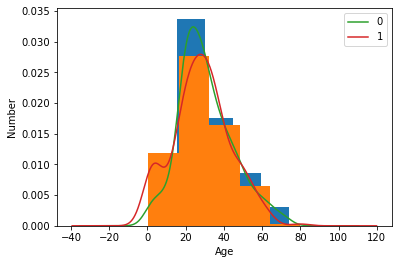

In [93]:
df.Age[df.Survived == 0].hist(bins = 5, density = 1)
df.Age[df.Survived == 1].hist(bins = 5, density = 1)
df.Age[df.Survived == 0].plot.density()
df.Age[df.Survived == 1].plot.density()
plt.legend([0,1])
plt.xlabel('Age')
plt.ylabel('Number')

### 2.7.7 任务七：可视化展示泰坦尼克号数据集中不同仓位等级的人年龄分布情况。（用折线图试试）

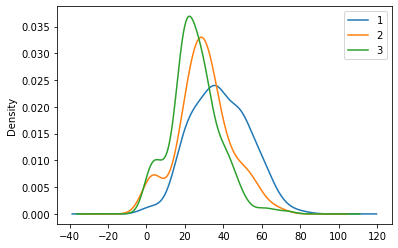

In [117]:
df.Age[df.Pclass == 1].plot.density()
df.Age[df.Pclass == 2].plot.density()
df.Age[df.Pclass == 3].plot.density()
plt.legend([1,2,3])

In [118]:
import seaborn

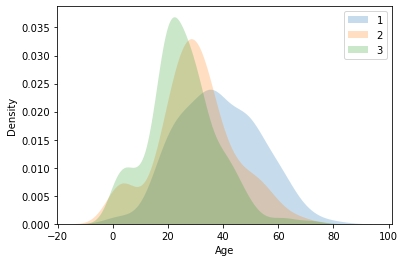

In [126]:
for i in [1,2,3]:
    seaborn.kdeplot(df.Age[df.Pclass == i], shade = True, linewidth = 0)
    plt.legend([1,2,3])